In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e, m_e, pi

In [65]:
R = 1.6e-2 # effective magnet radius [m]
B = .4 # magnetic field strength [T]

def T(phi):
    '''
    Arguments:
    ----------
    phi : [float]
        angle in degrees
        
    Returns:
    --------
    T : [float]
        kinnetic energy in eV
    '''
    phi = phi / 360 * 2 * pi # conversion to radians
    pc = e*B*R*c/np.tan(phi/2) # momentum
    T = np.sqrt((pc**2 + (m_e * c**2)**2)) - m_e*c**2 # kinetic energy
    
    return T / e # conversion to eV

T = np.vectorize(T, otypes = [float])

Maximum number of counts: 354 at 100° (1178107.514 eV).


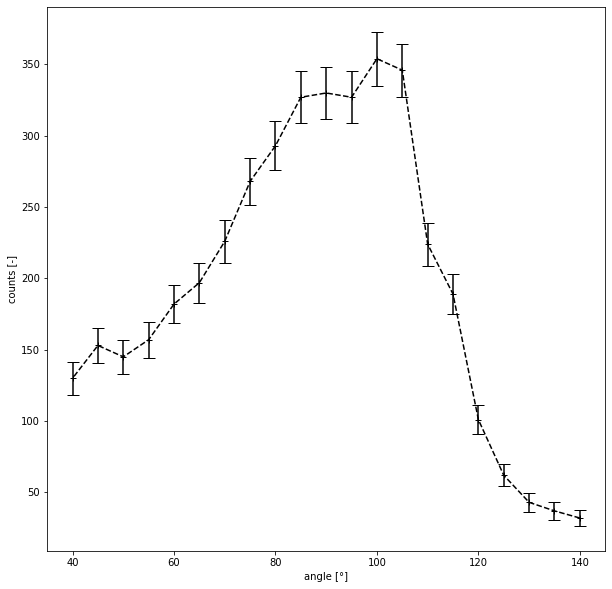

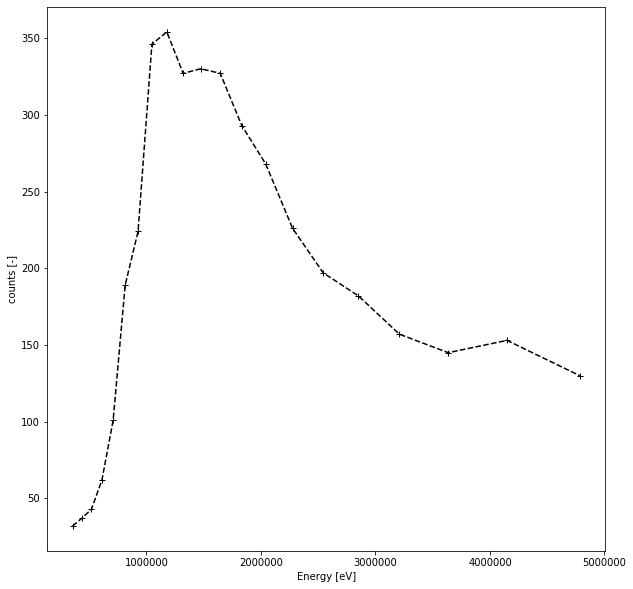

In [64]:
# U = 445 V, t = 200s
phi = [140, 135, 130, 125, 120, 115, 110, 105, 100,  95,  90,  85,  80,  75,  70,  65,  60,  55,  50,  45,  40]
n =   [ 32,  37,  43,  62, 101, 189, 224, 346, 354, 327, 330, 327, 293, 268, 226, 197, 182, 157, 145, 153, 130]
T_arr = T(phi)
err = np.sqrt(n)

print('Maximum number of counts: %i at %i° (%.3f eV).' % (max(n), phi[np.argmax(n)], T_arr[np.argmax(n)]))

fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.set_xlabel('angle [°]')
ax.set_ylabel('counts [-]')
ax.errorbar(phi, n, yerr = err, fmt= 'k+--', capsize = 6)

fig2, ax2 = plt.subplots(1,1,figsize = (10,10))
ax2.set_xlabel('Energy [eV]')
ax2.set_ylabel('counts [-]')
ax2.plot(T_arr, n, 'k+--')